```{contents}

```

## Bayes’ Theorem

Bayes’ Theorem is a **formula that allows you to update the probability of an event** based on new evidence.

It answers the question:

> “Given that we observed some evidence, what is the probability of a hypothesis being true?”

---

### The Formula

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where:

* $P(A|B)$ = **Posterior Probability** → probability of A given B
* $P(B|A)$ = **Likelihood** → probability of observing B if A is true
* $P(A)$ = **Prior Probability** → initial belief about A
* $P(B)$ = **Evidence** → total probability of observing B

---

### Explanation of Terms

1. **Prior ($P(A)$)**

   * Your initial belief about the event before seeing the evidence.
   * Example: Probability a person has a disease = 1%.

2. **Likelihood ($P(B|A)$)**

   * Probability of the evidence assuming the hypothesis is true.
   * Example: Probability of a positive test if the person has the disease = 99%.

3. **Evidence ($P(B)$)**

   * Total probability of observing the evidence under all hypotheses.
   * Example: Probability of a positive test overall.

4. **Posterior ($P(A|B)$)**

   * Updated probability of the hypothesis after seeing evidence.
   * Example: Probability the person actually has the disease given a positive test.

---

### Example

**Problem:**

* Disease prevalence: 1% ($P(D) = 0.01$)
* Test sensitivity: 99% ($P(T+|D) = 0.99$)
* Test false positive rate: 5% ($P(T+|\neg D) = 0.05$)

**Question:** Probability the patient has the disease if test is positive?

**Step 1: Total probability of a positive test**

$$
P(T+) = P(T+|D) \cdot P(D) + P(T+|\neg D) \cdot P(\neg D)
$$

$$
P(T+) = 0.99 \cdot 0.01 + 0.05 \cdot 0.99 = 0.0594
$$

**Step 2: Apply Bayes’ Theorem**

$$
P(D|T+) = \frac{P(T+|D) \cdot P(D)}{P(T+)} = \frac{0.99 \cdot 0.01}{0.0594} \approx 0.167
$$

✅ **Interpretation:** Even with a highly accurate test, the probability of having the disease given a positive test is \~16.7% because the disease is rare.

---

**5. Key Insights**

1. Bayes’ theorem **updates beliefs** based on new evidence.
2. **Rare events** can have surprisingly low posterior probabilities even with good tests.
3. Widely used in **medicine, machine learning, spam detection, and decision-making under uncertainty**.



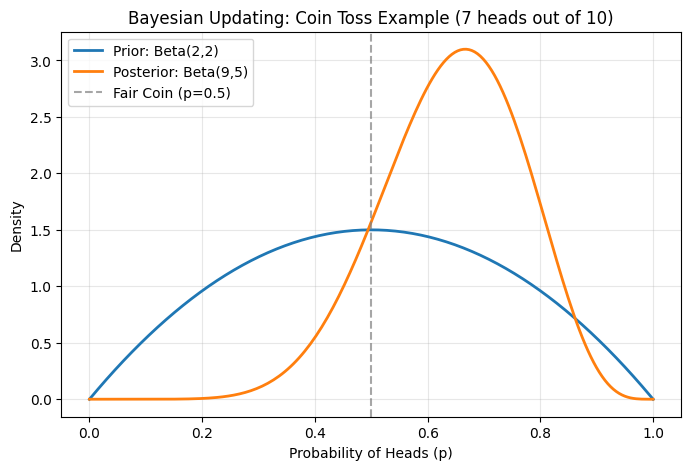

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

# Example: Coin toss with Bayesian updating

# Prior: Beta(2,2) -> belief coin is fair (centered at 0.5)
a_prior, b_prior = 2, 2

# Data: 10 tosses, 7 heads
n = 10
k = 7

# Posterior parameters for Beta distribution (conjugate prior for binomial likelihood)
a_post = a_prior + k
b_post = b_prior + (n - k)

# Range of probabilities
p = np.linspace(0, 1, 200)

# Plot Prior and Posterior
plt.figure(figsize=(8,5))
plt.plot(p, beta.pdf(p, a_prior, b_prior), label=f"Prior: Beta({a_prior},{b_prior})", linewidth=2)
plt.plot(p, beta.pdf(p, a_post, b_post), label=f"Posterior: Beta({a_post},{b_post})", linewidth=2)
plt.axvline(0.5, color="gray", linestyle="--", alpha=0.7, label="Fair Coin (p=0.5)")
plt.title("Bayesian Updating: Coin Toss Example (7 heads out of 10)")
plt.xlabel("Probability of Heads (p)")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Problem Statement

A doctor wants to know if a patient has a certain disease.

* **Prior knowledge:** From previous studies, 1% of people in the population have this disease.
* **Test information:** There is a medical test for the disease:

  * If someone **has** the disease, the test is positive 99% of the time (sensitivity).
  * If someone **does not have** the disease, the test is negative 95% of the time (specificity).

```{note}

| Term         | Meaning                          | 1 − Term (probability form)           |
| ------------ | -------------------------------- | ------------------------------------- |
| TP / (TP+FN) | Sensitivity (True Positive Rate) | 1 − Sensitivity = False Negative Rate |
| TN / (TN+FP) | Specificity (True Negative Rate) | 1 − Specificity = False Positive Rate |
| FP / (TN+FP) | False Positive Rate              | 1 − FPR = Specificity                 |
| FN / (TP+FN) | False Negative Rate              | 1 − FNR = Sensitivity                 |

```

**Question:** If a patient tests positive, what is the probability that they actually have the disease?

This is a classic **Bayesian inference problem**.

---

**Step 1: Define the Probabilities**

Let’s denote:

* $D = $ patient has the disease
* $\neg D =$ patient does not have the disease
* $T = $ test is positive

We know:

$$
P(D) = 0.01 \quad \text{(prior probability of disease)}
$$

$$
P(\neg D) = 0.99
$$

$$
P(T|D) = 0.99 \quad \text{(sensitivity)}
$$

$$
P(T|\neg D) = 0.05 \quad \text{(false positive rate)}
$$

---

**Step 2: Apply Bayes’ Theorem**

Bayes’ theorem:

$$
P(D|T) = \frac{P(T|D) \cdot P(D)}{P(T)}
$$

Where $P(T)$ is the **total probability of a positive test**:

$$
P(T) = P(T|D) \cdot P(D) + P(T|\neg D) \cdot P(\neg D)
$$

Plug in the numbers:

$$
P(T) = (0.99 \cdot 0.01) + (0.05 \cdot 0.99)
$$

$$
P(T) = 0.0099 + 0.0495 = 0.0594
$$

---

**Step 3: Calculate Posterior Probability**

$$
P(D|T) = \frac{P(T|D) \cdot P(D)}{P(T)} = \frac{0.99 \cdot 0.01}{0.0594}
$$

$$
P(D|T) = \frac{0.0099}{0.0594} \approx 0.1667
$$

---

**Step 4: Interpretation**

Even though the test is highly accurate, the probability that the patient **actually has the disease given a positive test** is only **\~16.7%**.

* This is because the disease is **very rare**, so false positives dominate.
* Bayesian reasoning takes both the prior probability and the test accuracy into account.
